In [8]:
# 1️⃣ Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [9]:
import pandas as pd

data = pd.read_csv('../data/spam.csv', encoding='latin-1')
print(data.columns)


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [10]:
# 2️⃣ Load dataset
data = pd.read_csv('../data/spam.csv', usecols=['v1', 'v2'], encoding='latin-1')
data = data.rename(columns={'v1': 'label', 'v2': 'message'})
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# 3️⃣ Dataset info
print("Shape:", data.shape)
print("\nInfo:")
print(data.info())
print("\nDescription:")
print(data.describe())

Shape: (5572, 2)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

Description:
       label                 message
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


In [12]:
# 4️⃣ Check for missing values
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
label      0
message    0
dtype: int64


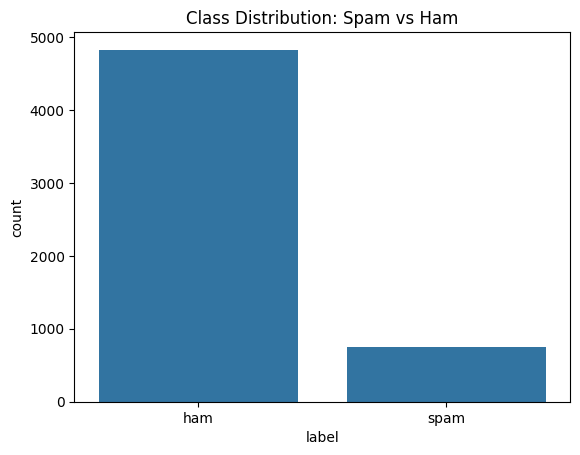


Counts per class:
label
ham     4825
spam     747
Name: count, dtype: int64


In [13]:
# 5️⃣ Explore target variable distribution
sns.countplot(x='label', data=data)
plt.title('Class Distribution: Spam vs Ham')
plt.show()

print("\nCounts per class:")
print(data['label'].value_counts())

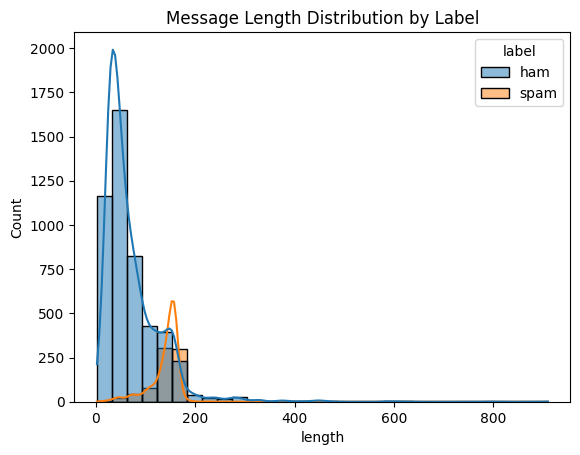

In [14]:
# 6️⃣ Explore message length
data['length'] = data['message'].apply(len)
sns.histplot(data, x='length', hue='label', bins=30, kde=True)
plt.title('Message Length Distribution by Label')
plt.show()

In [15]:
# 7️⃣ Quick text cleaning (optional)
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

data['cleaned_message'] = data['message'].apply(clean_text)
data.head()

,label,message,length,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",111,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah i dont think he goes to usf he lives aroun...


In [16]:
# 8️⃣ Sample of cleaned messages
data[['label', 'cleaned_message']].head(10)

,label,cleaned_message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...
5,spam,freemsg hey there darling its been 3 weeks now...
6,ham,even my brother is not like to speak with me t...
7,ham,as per your request melle melle oru minnaminun...
8,spam,winner as a valued network customer you have b...
9,spam,had your mobile 11 months or more u r entitled...
